# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
today=date.today()
date_today=today.strftime("%m/%d/%Y")
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
City=[]
Country=[]
Date=[]
Cloudiness=[]
Humidity=[]
Lat=[]
Lng=[]
Max_temp=[]
Windspeed=[]

In [5]:


base_url = "http://api.openweathermap.org/data/2.5/weather?"
units='imperial'
query_url = base_url + "appid="+ api_key +"&units="+ units + "&q=" 

for city in cities:
    response=requests.get(query_url+city)
    response_json=response.json()
    print(response.url)
    print(response_json)
    try:
        City.append(response_json['name'])
        Country.append(response_json['sys']['country'])
        Date.append(response_json['dt'])
        Cloudiness.append(response_json['clouds']['all'])
        Humidity.append(response_json['main']['humidity'])
        Lat.append(response_json['coord']['lat'])
        Lng.append(response_json['coord']['lon'])
        Max_temp.append(response_json['main']['temp_max'])
        Windspeed.append(response_json['wind']['speed'])
    except KeyError:
        print(city)
    

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=trairi
{'coord': {'lon': -39.27, 'lat': -3.28}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 73.72, 'pressure': 1011.96, 'humidity': 97, 'temp_min': 73.72, 'temp_max': 73.72, 'sea_level': 1011.96, 'grnd_level': 989.115}, 'wind': {'speed': 1.57, 'deg': 130.048}, 'rain': {'3h': 7}, 'clouds': {'all': 100}, 'dt': 1555819032, 'sys': {'message': 0.0045, 'country': 'BR', 'sunrise': 1555835699, 'sunset': 1555878978}, 'id': 3386177, 'name': 'Trairi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=port%20lincoln
{'coord': {'lon': 135.86, 'lat': -34.72}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 61.32, 'pressure': 1021.874, 'humidity': 64, 'temp_min': 61.32, 'temp_max

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=tuatapere
{'coord': {'lon': 167.69, 'lat': -46.13}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 55.99, 'pressure': 1028, 'humidity': 80, 'temp_min': 55.99, 'temp_max': 55.99}, 'wind': {'speed': 7, 'deg': 74.387}, 'clouds': {'all': 24}, 'dt': 1555819208, 'sys': {'type': 3, 'id': 2008959, 'message': 0.0055, 'country': 'NZ', 'sunrise': 1555788735, 'sunset': 1555826614}, 'id': 2180815, 'name': 'Tuatapere', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=rikitea
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.71, 'pressure': 1014.422, 'humidity': 79, 'temp_min': 78.71, 'temp_max': 78.71, 'sea_level': 1014.422, 'grnd_level': 1

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=atuona
{'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 83.23, 'pressure': 1010.148, 'humidity': 75, 'temp_min': 83.23, 'temp_max': 83.23, 'sea_level': 1010.148, 'grnd_level': 1010.091}, 'wind': {'speed': 12.33, 'deg': 88.21}, 'clouds': {'all': 0}, 'dt': 1555819268, 'sys': {'message': 0.0052, 'country': 'PF', 'sunrise': 1555773569, 'sunset': 1555816210}, 'id': 4020109, 'name': 'Atuona', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=broome
{'coord': {'lon': 1.45, 'lat': 52.47}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 43.02, 'pressure': 1025, 'humidity': 93, 'temp_min': 37.99, 'temp_max': 50}, 'visibility': 3800, 'wind': {'speed':

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=mezhdurechensk
{'coord': {'lon': 88.07, 'lat': 53.69}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 36.43, 'pressure': 1014.722, 'humidity': 64, 'temp_min': 36.43, 'temp_max': 36.43, 'sea_level': 1014.722, 'grnd_level': 967.131}, 'wind': {'speed': 7.23, 'deg': 260.038}, 'clouds': {'all': 100}, 'dt': 1555819271, 'sys': {'message': 0.0047, 'country': 'RU', 'sunrise': 1555800900, 'sunset': 1555852662}, 'id': 1498920, 'name': 'Mezhdurechensk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=marsassoum
{'coord': {'lon': -15.98, 'lat': 12.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68, 'pressure': 1012, 'humidity': 94, 'temp_min': 68, 'temp_max': 68}, 'visibi

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=hithadhoo
{'coord': {'lon': 73.08, 'lat': -0.6}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 84.47, 'pressure': 1008.982, 'humidity': 78, 'temp_min': 84.47, 'temp_max': 84.47, 'sea_level': 1008.982, 'grnd_level': 1009.019}, 'wind': {'speed': 16.96, 'deg': 249.061}, 'rain': {'3h': 2.5}, 'clouds': {'all': 100}, 'dt': 1555819278, 'sys': {'message': 0.0041, 'country': 'MV', 'sunrise': 1555808604, 'sunset': 1555852152}, 'id': 1282256, 'name': 'Hithadhoo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=butaritari
{'coord': {'lon': 172.79, 'lat': 3.07}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.29, 'pressure': 1007.226, 'humidity': 75, 'temp_min': 84.29, 't

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=ahipara
{'coord': {'lon': 173.16, 'lat': -35.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 68, 'pressure': 1023, 'humidity': 91, 'temp_min': 68, 'temp_max': 68}, 'wind': {'speed': 12.44, 'deg': 314.818}, 'clouds': {'all': 1}, 'dt': 1555819091, 'sys': {'type': 3, 'id': 2016422, 'message': 0.0051, 'country': 'NZ', 'sunrise': 1555786507, 'sunset': 1555826218}, 'id': 2194098, 'name': 'Ahipara', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=ilulissat
{'coord': {'lon': -51.1, 'lat': 69.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.2, 'pressure': 1003, 'humidity': 53, 'temp_min': 21.2, 'temp_max': 21.2}, 'wind': {'speed': 5.82, 'deg': 120}, 'clouds': {'al

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=mehran
{'coord': {'lon': 46.17, 'lat': 33.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 1015, 'humidity': 75, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1555817400, 'sys': {'type': 1, 'id': 7458, 'message': 0.0051, 'country': 'IR', 'sunrise': 1555813123, 'sunset': 1555860548}, 'id': 124291, 'name': 'Mehran', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=mount%20isa
{'coord': {'lon': 139.49, 'lat': -20.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 87.8, 'pressure': 1013, 'humidity': 25, 'temp_min': 87.8, 'temp_max': 87.8}, 'visibility': 10000, 'wind': {'spe

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=adur
{'coord': {'lon': 48.3, 'lat': 41.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 41, 'pressure': 1020, 'humidity': 86, 'temp_min': 41, 'temp_max': 41}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 90}, 'clouds': {'all': 26}, 'dt': 1555815600, 'sys': {'type': 1, 'id': 8844, 'message': 0.0051, 'country': 'AZ', 'sunrise': 1555811946, 'sunset': 1555860703}, 'id': 585786, 'name': 'Adur', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=lasa
{'coord': {'lon': 32.53, 'lat': 34.92}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 49.89, 'pressure': 1012, 'humidity': 70, 'temp_min': 46.4, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 11.41, '

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=bambanglipuro
{'coord': {'lon': 110.28, 'lat': -7.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.29, 'pressure': 1009.688, 'humidity': 75, 'temp_min': 84.29, 'temp_max': 84.29, 'sea_level': 1009.688, 'grnd_level': 1009.162}, 'wind': {'speed': 13.42, 'deg': 117.048}, 'clouds': {'all': 10}, 'dt': 1555819290, 'sys': {'message': 0.005, 'country': 'ID', 'sunrise': 1555800042, 'sunset': 1555842861}, 'id': 1650434, 'name': 'Bambanglipuro', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=karratha
{'coord': {'lon': 116.85, 'lat': -20.74}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.46, 'pressure': 1015.94, 'humidity': 17, 'temp_min': 85.46, 'temp_max': 85.46

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=fort%20nelson
{'coord': {'lon': -122.69, 'lat': 58.81}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 46.4, 'pressure': 1014, 'humidity': 22, 'temp_min': 46.4, 'temp_max': 46.4}, 'visibility': 48279, 'wind': {'speed': 4.7, 'deg': 300}, 'clouds': {'all': 20}, 'dt': 1555815600, 'sys': {'type': 1, 'id': 986, 'message': 0.0066, 'country': 'CA', 'sunrise': 1555764219, 'sunset': 1555817718}, 'id': 5955902, 'name': 'Fort Nelson', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=bonavista
{'coord': {'lon': -53.11, 'lat': 48.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.01, 'pressure': 1025, 'humidity': 86, 'temp_min': 35.01, 'temp_max': 35.01}, 'wind': {'speed':

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=botwood
{'coord': {'lon': -55.34, 'lat': 49.14}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 39.09, 'pressure': 1027, 'humidity': 100, 'temp_min': 36, 'temp_max': 41}, 'visibility': 32186, 'wind': {'speed': 3.36, 'deg': 260}, 'clouds': {'all': 40}, 'dt': 1555819271, 'sys': {'type': 1, 'id': 912, 'message': 0.0051, 'country': 'CA', 'sunrise': 1555835914, 'sunset': 1555886475}, 'id': 5906229, 'name': 'Botwood', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=rungata
{'cod': '404', 'message': 'city not found'}
rungata
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=ayan
{'coord': {'lon': 33.6, 'lat': 40.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds',

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=grand%20gaube
{'coord': {'lon': 57.66, 'lat': -20.01}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.3, 'pressure': 1015, 'humidity': 83, 'temp_min': 78.8, 'temp_max': 80.01}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1555819144, 'sys': {'type': 1, 'id': 2061, 'message': 0.0061, 'country': 'MU', 'sunrise': 1555813300, 'sunset': 1555854857}, 'id': 934479, 'name': 'Grand Gaube', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=wardenburg
{'coord': {'lon': 8.19, 'lat': 53.07}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 39.85, 'pressure': 1026, 'humidity': 81, 'temp_min': 37, 'temp_max': 42.01}, 'visibility': 10000, 

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=vestnes
{'coord': {'lon': 7.09, 'lat': 62.63}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 301, 'main': 'Drizzle', 'description': 'drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 44.92, 'pressure': 1023, 'humidity': 100, 'temp_min': 43, 'temp_max': 46.4}, 'visibility': 8000, 'wind': {'speed': 12.75, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1555819302, 'sys': {'type': 1, 'id': 1602, 'message': 0.0057, 'country': 'NO', 'sunrise': 1555818437, 'sunset': 1555873990}, 'id': 3345453, 'name': 'Vestnes', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=hualmay
{'coord': {'lon': -77.61, 'lat': -11.1}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68.79, 'pressure': 1016.752, 'humidi

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=mnogovershinnyy
{'coord': {'lon': 139.92, 'lat': 53.94}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 39.07, 'pressure': 1005.482, 'humidity': 61, 'temp_min': 39.07, 'temp_max': 39.07, 'sea_level': 1005.482, 'grnd_level': 966.315}, 'wind': {'speed': 11.16, 'deg': 164.978}, 'clouds': {'all': 100}, 'dt': 1555819305, 'sys': {'message': 0.0054, 'country': 'RU', 'sunrise': 1555788436, 'sunset': 1555840241}, 'id': 2019935, 'name': 'Mnogovershinnyy', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=hilo
{'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.64, 'pressure': 1019, 'humidity': 69, 'temp_min': 69.01, 'temp_max': 77}, 'v

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=atar
{'coord': {'lon': -13.05, 'lat': 20.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.16, 'pressure': 1009.926, 'humidity': 21, 'temp_min': 77.16, 'temp_max': 77.16, 'sea_level': 1009.926, 'grnd_level': 993.019}, 'wind': {'speed': 11.83, 'deg': 28.378}, 'clouds': {'all': 0}, 'dt': 1555819309, 'sys': {'message': 0.0064, 'country': 'MR', 'sunrise': 1555828154, 'sunset': 1555873939}, 'id': 2381334, 'name': 'Atar', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=sitka
{'coord': {'lon': -99.65, 'lat': 37.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.01, 'pressure': 1002, 'humidity': 45, 'temp_min': 69.01, 'temp_max': 69.01}, 'wind': {'speed': 8.99, 'deg': 

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=goldap
{'coord': {'lon': 22.3, 'lat': 54.31}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 40.04, 'pressure': 1024.122, 'humidity': 91, 'temp_min': 40.04, 'temp_max': 40.04, 'sea_level': 1024.122, 'grnd_level': 1013.562}, 'wind': {'speed': 5.82, 'deg': 315.078}, 'clouds': {'all': 13}, 'dt': 1555819312, 'sys': {'message': 0.0048, 'country': 'PL', 'sunrise': 1555816561, 'sunset': 1555868567}, 'id': 771953, 'name': 'Goldap', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=tabiauea
{'cod': '404', 'message': 'city not found'}
tabiauea
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=hutchinson
{'coord': {'lon': -97.93, 'lat': 38.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'cl

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=minsk
{'coord': {'lon': 27.56, 'lat': 53.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 41, 'pressure': 1020, 'humidity': 80, 'temp_min': 41, 'temp_max': 41}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1555817400, 'sys': {'type': 1, 'id': 8939, 'message': 0.0036, 'country': 'BY', 'sunrise': 1555815366, 'sunset': 1555867236}, 'id': 625144, 'name': 'Minsk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=samusu
{'cod': '404', 'message': 'city not found'}
samusu
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=balgazyn
{'coord': {'lon': 95.2, 'lat': 51}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'b

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=cayeli
{'coord': {'lon': 40.73, 'lat': 41.09}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 41.21, 'pressure': 1015.366, 'humidity': 94, 'temp_min': 41.21, 'temp_max': 41.21, 'sea_level': 1015.366, 'grnd_level': 986.939}, 'wind': {'speed': 4.83, 'deg': 293.801}, 'clouds': {'all': 61}, 'dt': 1555819317, 'sys': {'message': 0.0046, 'country': 'TR', 'sunrise': 1555813763, 'sunset': 1555862519}, 'id': 749502, 'name': 'Cayeli', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=asayita
{'cod': '404', 'message': 'city not found'}
asayita
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=chifeng
{'coord': {'lon': 118.96, 'lat': 42.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clea

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=ca%20mau
{'coord': {'lon': 105.15, 'lat': 9.18}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 94.98, 'pressure': 1008.582, 'humidity': 43, 'temp_min': 94.98, 'temp_max': 94.98, 'sea_level': 1008.582, 'grnd_level': 1007.915}, 'wind': {'speed': 6.35, 'deg': 141.929}, 'clouds': {'all': 49}, 'dt': 1555819320, 'sys': {'message': 0.0044, 'country': 'VN', 'sunrise': 1555800417, 'sunset': 1555844948}, 'id': 1586443, 'name': 'Ca Mau', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=kavaratti
{'coord': {'lon': 72.64, 'lat': 10.57}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86, 'pressure': 1010, 'humidity': 66, 'temp_min': 86, 'temp_max': 86}, 'visibility': 

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=sinnamary
{'coord': {'lon': -52.96, 'lat': 5.38}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 81.03, 'pressure': 1013.432, 'humidity': 77, 'temp_min': 81.03, 'temp_max': 81.03, 'sea_level': 1013.432, 'grnd_level': 1013.195}, 'wind': {'speed': 18.39, 'deg': 62.434}, 'rain': {'3h': 0.25}, 'clouds': {'all': 99}, 'dt': 1555819324, 'sys': {'message': 0.0045, 'country': 'GF', 'sunrise': 1555838548, 'sunset': 1555882699}, 'id': 3380290, 'name': 'Sinnamary', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=meridian
{'coord': {'lon': -88.7, 'lat': 32.36}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 52.75, 'pressure': 1017, 'humidity': 71, 'temp_min': 51.8, 'temp_max': 53.6}

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=port%20keats
{'coord': {'lon': 129.55, 'lat': -14.25}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 93.67, 'pressure': 1010.658, 'humidity': 36, 'temp_min': 93.67, 'temp_max': 93.67, 'sea_level': 1010.658, 'grnd_level': 1007.851}, 'wind': {'speed': 3.04, 'deg': 46.815}, 'clouds': {'all': 29}, 'dt': 1555819328, 'sys': {'message': 0.0095, 'country': 'AU', 'sunrise': 1555795737, 'sunset': 1555837918}, 'id': 2063039, 'name': 'Port Keats', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=provideniya
{'coord': {'lon': -173.23, 'lat': 64.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.14, 'pressure': 1015.222, 'humidity': 63, 'temp_min': 12.14, 'temp_max

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=urukh
{'coord': {'lon': 44.03, 'lat': 43.3}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 35.35, 'pressure': 1019, 'humidity': 96, 'temp_min': 35.01, 'temp_max': 35.6}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 100}, 'clouds': {'all': 93}, 'dt': 1555817400, 'sys': {'type': 1, 'id': 8969, 'message': 0.0047, 'country': 'RU', 'sunrise': 1555812757, 'sunset': 1555861941}, 'id': 478601, 'name': 'Urukh', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=sorvag
{'cod': '404', 'message': 'city not found'}
sorvag
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=labuhan
{'coord': {'lon': 115.51, 'lat': -2.54}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'b

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=kaeo
{'coord': {'lon': 173.78, 'lat': -35.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 68, 'pressure': 1023, 'humidity': 91, 'temp_min': 68, 'temp_max': 68}, 'wind': {'speed': 7.05, 'deg': 1.872}, 'rain': {'3h': 0.188}, 'clouds': {'all': 17}, 'dt': 1555819091, 'sys': {'type': 3, 'id': 2016422, 'message': 0.0051, 'country': 'NZ', 'sunrise': 1555786353, 'sunset': 1555826074}, 'id': 2189343, 'name': 'Kaeo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=tautira
{'coord': {'lon': -149.15, 'lat': -17.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 84.09, 'pressure': 1010, 'humidity': 70, 'temp_min': 84, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 1

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=lekoni
{'coord': {'lon': 14.26, 'lat': -1.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.93, 'pressure': 1010.244, 'humidity': 95, 'temp_min': 70.93, 'temp_max': 70.93, 'sea_level': 1010.244, 'grnd_level': 941.562}, 'wind': {'speed': 4.72, 'deg': 222.671}, 'clouds': {'all': 99}, 'dt': 1555819335, 'sys': {'message': 0.0046, 'country': 'GA', 'sunrise': 1555822768, 'sunset': 1555866218}, 'id': 2399831, 'name': 'Lekoni', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=malinovoye%20ozero
{'coord': {'lon': 79.77, 'lat': 51.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 40.53, 'pressure': 1019.678, 'humidity': 47, 'temp_min': 40.53, 'temp_max': 40.53, 'sea_

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=lixourion
{'coord': {'lon': 20.43, 'lat': 38.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.67, 'pressure': 1024, 'humidity': 82, 'temp_min': 55.99, 'temp_max': 60.01}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1555819328, 'sys': {'type': 1, 'id': 6653, 'message': 0.0057, 'country': 'GR', 'sunrise': 1555818890, 'sunset': 1555867135}, 'id': 258175, 'name': 'Lixourion', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=moron%20de%20la%20frontera
{'coord': {'lon': -5.45, 'lat': 37.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 57.06, 'pressure': 1010, 'humidity': 72, 'temp_min': 51.8, 'temp_max': 62.01}, 'visibi

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=chabahar
{'coord': {'lon': 60.65, 'lat': 25.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 83.42, 'pressure': 1007.176, 'humidity': 43, 'temp_min': 83.42, 'temp_max': 83.42, 'sea_level': 1007.176, 'grnd_level': 1002.171}, 'wind': {'speed': 3.87, 'deg': 276.38}, 'clouds': {'all': 0}, 'dt': 1555819344, 'sys': {'message': 0.0051, 'country': 'IR', 'sunrise': 1555810186, 'sunset': 1555856536}, 'id': 1161724, 'name': 'Chabahar', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=urucara
{'coord': {'lon': -57.76, 'lat': -2.54}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.61, 'pressure': 1011.406, 'humidity': 93, 'temp_min': 75.61, 'temp_max': 75.61, 'sea_level': 1

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=dzhuryn
{'coord': {'lon': 25.58, 'lat': 49.03}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.6, 'pressure': 1021, 'humidity': 70, 'temp_min': 44.6, 'temp_max': 44.6}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 210}, 'clouds': {'all': 90}, 'dt': 1555817400, 'sys': {'type': 1, 'id': 8906, 'message': 0.0047, 'country': 'UA', 'sunrise': 1555816533, 'sunset': 1555867020}, 'id': 710400, 'name': 'Dzhuryn', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=tiksi
{'coord': {'lon': 128.87, 'lat': 71.64}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.96, 'pressure': 1006.46, 'humidity': 76, 'temp_min': 15.96, 'temp_max': 15.96, 'sea_level': 1006.46, '

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=yekaterinovka
{'coord': {'lon': 38.75, 'lat': 46.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 43.19, 'pressure': 1024.108, 'humidity': 63, 'temp_min': 43.19, 'temp_max': 43.19, 'sea_level': 1024.108, 'grnd_level': 1023.802}, 'wind': {'speed': 14.34, 'deg': 62.792}, 'clouds': {'all': 0}, 'dt': 1555819351, 'sys': {'message': 0.0041, 'country': 'RU', 'sunrise': 1555813658, 'sunset': 1555863574}, 'id': 488635, 'name': 'Yekaterinovka', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=laguna
{'coord': {'lon': -110.01, 'lat': 27.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.97, 'pressure': 1011.168, 'humidity': 54, 'temp_min': 73.97, 'temp_max': 73.97, 'sea_leve

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=phalaborwa
{'coord': {'lon': 31.14, 'lat': -23.95}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 66.2, 'pressure': 1018, 'humidity': 88, 'temp_min': 66.2, 'temp_max': 66.2}, 'wind': {'speed': 8.05, 'deg': 180}, 'clouds': {'all': 38}, 'dt': 1555815600, 'sys': {'type': 1, 'id': 1915, 'message': 0.0041, 'country': 'ZA', 'sunrise': 1555819889, 'sunset': 1555860995}, 'id': 965528, 'name': 'Phalaborwa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=escanaba
{'coord': {'lon': -87.06, 'lat': 45.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 46, 'pressure': 1009, 'humidity': 26, 'temp_min': 42.01, 'temp_max': 51.01}, 'visibility': 16093, 'wind': {'speed':

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=mudanya
{'coord': {'lon': 28.88, 'lat': 40.38}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.28, 'pressure': 1023, 'humidity': 93, 'temp_min': 41, 'temp_max': 45}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1555816800, 'sys': {'type': 1, 'id': 6982, 'message': 0.0047, 'country': 'TR', 'sunrise': 1555816670, 'sunset': 1555865299}, 'id': 741487, 'name': 'Mudanya', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=kahului
{'coord': {'lon': -156.47, 'lat': 20.89}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.36, 'pressure': 1019, 'humidity': 78, 'temp_min': 71.01, 'temp_max': 78.01}, 'visibility': 16093, 'wind': 

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=uglovskoye
{'coord': {'lon': 80.19, 'lat': 51.36}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 40.21, 'pressure': 1020.362, 'humidity': 48, 'temp_min': 40.21, 'temp_max': 40.21, 'sea_level': 1020.362, 'grnd_level': 997.595}, 'wind': {'speed': 8.05, 'deg': 292.263}, 'clouds': {'all': 0}, 'dt': 1555819362, 'sys': {'message': 0.0044, 'country': 'RU', 'sunrise': 1555803134, 'sunset': 1555854210}, 'id': 1488632, 'name': 'Uglovskoye', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=quang%20ngai
{'coord': {'lon': 108.8, 'lat': 15.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 106.14, 'pressure': 1007.872, 'humidity': 24, 'temp_min': 106.14, 'temp_max': 106.14, 'se

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=bargal
{'cod': '404', 'message': 'city not found'}
bargal
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=acapulco
{'coord': {'lon': -99.88, 'lat': 16.86}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1013, 'humidity': 94, 'temp_min': 77, 'temp_max': 77}, 'visibility': 8047, 'wind': {'speed': 3.36, 'deg': 350}, 'clouds': {'all': 40}, 'dt': 1555815000, 'sys': {'type': 1, 'id': 7103, 'message': 0.0045, 'country': 'MX', 'sunrise': 1555762832, 'sunset': 1555808157}, 'id': 3533462, 'name': 'Acapulco', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=vorukh
{'coord': {'lon': 70.57, 'lat': 39.85}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'i

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=kinshasa
{'coord': {'lon': 15.31, 'lat': -4.32}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.81, 'pressure': 1010.518, 'humidity': 94, 'temp_min': 73.81, 'temp_max': 73.81, 'sea_level': 1010.518, 'grnd_level': 971.386}, 'wind': {'speed': 3.74, 'deg': 251.163}, 'clouds': {'all': 100}, 'dt': 1555819368, 'sys': {'message': 0.0047, 'country': 'CD', 'sunrise': 1555822653, 'sunset': 1555865829}, 'id': 2314302, 'name': 'Kinshasa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=nakusp
{'coord': {'lon': -117.8, 'lat': 50.24}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 35.01, 'pressure': 1016, 'humidity': 99, 'temp_min': 35.01, 'temp_max': 35.01}, 'wind': {'sp

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=addi%20ugri
{'cod': '404', 'message': 'city not found'}
addi ugri
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=plettenberg%20bay
{'coord': {'lon': 23.37, 'lat': -34.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.53, 'pressure': 1024.042, 'humidity': 91, 'temp_min': 54.53, 'temp_max': 54.53, 'sea_level': 1024.042, 'grnd_level': 999.146}, 'wind': {'speed': 2.84, 'deg': 328.734}, 'clouds': {'all': 89}, 'dt': 1555819205, 'sys': {'message': 0.0047, 'country': 'ZA', 'sunrise': 1555822397, 'sunset': 1555862217}, 'id': 964712, 'name': 'Plettenberg Bay', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=grindavik
{'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 803, 'main'

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=mandalgovi
{'coord': {'lon': 106.27, 'lat': 45.76}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.47, 'pressure': 1005.118, 'humidity': 28, 'temp_min': 57.47, 'temp_max': 57.47, 'sea_level': 1005.118, 'grnd_level': 846.906}, 'wind': {'speed': 9.82, 'deg': 165.983}, 'clouds': {'all': 75}, 'dt': 1555819374, 'sys': {'message': 0.0047, 'country': 'MN', 'sunrise': 1555797577, 'sunset': 1555847250}, 'id': 2030065, 'name': 'Mandalgovi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=aasiaat
{'coord': {'lon': -52.87, 'lat': 68.71}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.38, 'pressure': 1002.096, 'humidity': 68, 'temp_min': 24.38, 'temp_max': 24.38, '

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=shingu
{'coord': {'lon': 135.99, 'lat': 33.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1012, 'humidity': 77, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1555815600, 'sys': {'type': 1, 'id': 7959, 'message': 0.0044, 'country': 'JP', 'sunrise': 1555791539, 'sunset': 1555839025}, 'id': 1847947, 'name': 'Shingu', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=alampur
{'coord': {'lon': 78.14, 'lat': 15.88}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 94.26, 'pressure': 1008.044, 'humidity': 34, 'temp_min': 94.26, 'temp_max': 94.26, 'sea_level': 1008.044

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=meulaboh
{'coord': {'lon': 96.13, 'lat': 4.14}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.35, 'pressure': 1008.27, 'humidity': 80, 'temp_min': 83.35, 'temp_max': 83.35, 'sea_level': 1008.27, 'grnd_level': 1007.515}, 'wind': {'speed': 4.97, 'deg': 338.146}, 'clouds': {'all': 99}, 'dt': 1555819380, 'sys': {'message': 0.0041, 'country': 'ID', 'sunrise': 1555802837, 'sunset': 1555846857}, 'id': 1214488, 'name': 'Meulaboh', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=union
{'coord': {'lon': -123.1, 'lat': 47.36}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.94, 'pressure': 1019, 'humidity': 87, 'temp_min': 48, 'temp_max': 55.99}, 'visibility': 16093, 

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=serenje
{'coord': {'lon': 30.22, 'lat': -13.23}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.29, 'pressure': 1015.932, 'humidity': 99, 'temp_min': 57.29, 'temp_max': 57.29, 'sea_level': 1015.932, 'grnd_level': 861.659}, 'wind': {'speed': 4.63, 'deg': 115.984}, 'clouds': {'all': 3}, 'dt': 1555819383, 'sys': {'message': 0.0042, 'country': 'ZM', 'sunrise': 1555819526, 'sunset': 1555861801}, 'id': 898912, 'name': 'Serenje', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=ponta%20delgada
{'coord': {'lon': -25.67, 'lat': 37.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 56.84, 'pressure': 1027, 'humidity': 87, 'temp_min': 55, 'temp_max': 59}, 'visibility': 100

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=penzance
{'coord': {'lon': -5.53, 'lat': 50.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 53.62, 'pressure': 1023, 'humidity': 57, 'temp_min': 51.01, 'temp_max': 57.99}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 40}, 'clouds': {'all': 22}, 'dt': 1555819385, 'sys': {'type': 1, 'id': 1393, 'message': 0.0061, 'country': 'GB', 'sunrise': 1555823848, 'sunset': 1555874636}, 'id': 2640377, 'name': 'Penzance', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=kaduqli
{'coord': {'lon': 29.72, 'lat': 11.01}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.77, 'pressure': 1007.59, 'humidity': 7, 'temp_min': 84.77, 'temp_max': 84.77, 'sea_level': 1007.59, '

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=inhambane
{'coord': {'lon': 35.38, 'lat': -23.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 67.04, 'pressure': 1016.82, 'humidity': 96, 'temp_min': 67.04, 'temp_max': 67.04, 'sea_level': 1016.82, 'grnd_level': 1005.339}, 'wind': {'speed': 2.73, 'deg': 117.259}, 'clouds': {'all': 0}, 'dt': 1555819389, 'sys': {'message': 0.0054, 'country': 'MZ', 'sunrise': 1555818867, 'sunset': 1555859983}, 'id': 1045114, 'name': 'Inhambane', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=narsaq
{'coord': {'lon': -46.05, 'lat': 60.91}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 35.6, 'pressure': 1001, 'humidity': 69, 'temp_min': 35.6, 'temp_max': 35.6}, 'wind': {'speed'

http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=sawakin
{'coord': {'lon': 37.33, 'lat': 19.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 63.95, 'pressure': 1011.384, 'humidity': 45, 'temp_min': 63.95, 'temp_max': 63.95, 'sea_level': 1011.384, 'grnd_level': 940.123}, 'wind': {'speed': 2.26, 'deg': 59.609}, 'clouds': {'all': 0}, 'dt': 1555819392, 'sys': {'message': 0.0045, 'country': 'SD', 'sunrise': 1555816151, 'sunset': 1555861762}, 'id': 367544, 'name': 'Sawakin', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=47bfc2a9c0a1691dfe73a3ac86b9a39b&units=imperial&q=nago
{'coord': {'lon': 10.89, 'lat': 45.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 50.83, 'pressure': 1022, 'humidity': 62, 'temp_min': 42.01, 'temp_max': 55.99}, 'visibility': 10000, 'wind': {'

In [13]:
print("Beginning Data Retrieval\n"
     "------------------------------\n")
if response_json["cod"]==404:
    print("City not found.Skipping...")
for city in range(len(cities)):
    print("Processing Record %d of set | %s" % (city,cities[city]))
    
print("-------------------------------------\n"
     "Data Retrieval Complete\n"
     "--------------------------------------\n")    

Beginning Data Retrieval
------------------------------

Processing Record 0 of set | trairi
Processing Record 1 of set | port lincoln
Processing Record 2 of set | bluff
Processing Record 3 of set | caluquembe
Processing Record 4 of set | lavrentiya
Processing Record 5 of set | taksimo
Processing Record 6 of set | tuktoyaktuk
Processing Record 7 of set | port hedland
Processing Record 8 of set | guanica
Processing Record 9 of set | molchanovo
Processing Record 10 of set | santa clara
Processing Record 11 of set | malanje
Processing Record 12 of set | senekal
Processing Record 13 of set | cherskiy
Processing Record 14 of set | tuatapere
Processing Record 15 of set | rikitea
Processing Record 16 of set | bambous virieux
Processing Record 17 of set | albany
Processing Record 18 of set | bilibino
Processing Record 19 of set | torbay
Processing Record 20 of set | belushya guba
Processing Record 21 of set | saint-michel-des-saints
Processing Record 22 of set | klaksvik
Processing Record 23 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data={"City":City,
           "Country":Country,
           "Date":Date,
           "Cloudiness":Cloudiness,
           "Humidity":Humidity,
           "Lat":Lat,
           "Lng":Lng,
           "Max_temp":Max_temp,
           "Windspeed":Windspeed
          }
city_df=pd.DataFrame.from_dict(city_data)
export_csv=city_df.to_csv("output_data/cities.csv",encoding="utf-8",index=None,header=True)
city_df.count()

City          549
Country       549
Date          549
Cloudiness    549
Humidity      549
Lat           549
Lng           549
Max_temp      549
Windspeed     549
dtype: int64

In [7]:
city_df.head(15)

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max_temp,Windspeed
0,Trairi,BR,1555819032,100,97,-3.28,-39.27,73.72,1.57
1,Port Lincoln,AU,1555819260,15,64,-34.72,135.86,61.32,14.05
2,Bluff,AU,1555819261,68,52,-23.58,149.07,82.34,15.75
3,Caluquembe,AO,1555819261,94,95,-13.78,14.68,61.95,2.19
4,Lavrentiya,RU,1555819261,87,85,65.58,-170.99,1.97,4.36
5,Taksimo,RU,1555819261,83,35,56.36,114.84,25.25,7.94
6,Tuktoyaktuk,CA,1555815600,75,92,69.44,-133.03,21.20,8.05
7,Port Hedland,AU,1555817400,100,23,-20.31,118.58,82.40,17.22
8,Guanica,PR,1555819244,0,79,17.97,-66.91,77.00,6.46
9,Molchanovo,RU,1555819262,86,69,57.58,83.76,27.55,8.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

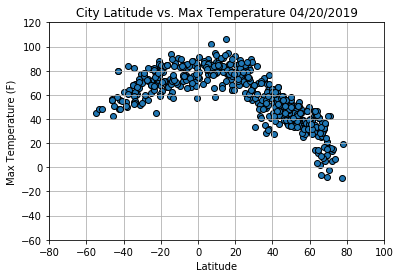

In [9]:
plt.scatter(city_df["Lat"],city_df["Max_temp"],
            edgecolor="black", marker="o"
             )
plt.title(f"City Latitude vs. Max Temperature {date_today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])
plt.savefig("output_data/LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

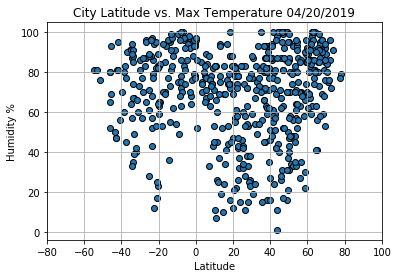

In [10]:
plt.scatter(city_df["Lat"],city_df["Humidity"],
            edgecolor="black", marker="o"
             )
plt.title(f"City Latitude vs. Max Temperature {date_today}")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])

plt.savefig("output_data/LatvsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

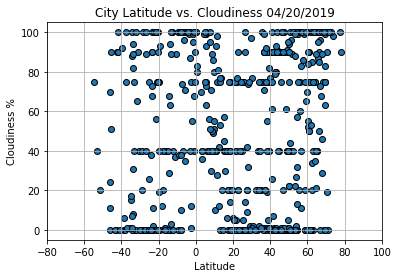

In [11]:
plt.scatter(city_df["Lat"],city_df["Cloudiness"],
            edgecolor="black", marker="o"
             )
plt.title(f"City Latitude vs. Cloudiness {date_today}")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])

plt.savefig("output_data/LatvsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

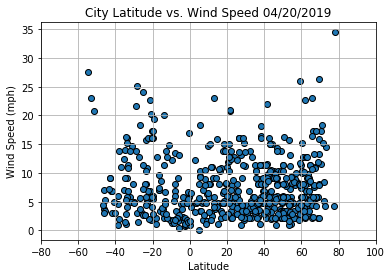

In [12]:
plt.scatter(city_df["Lat"],city_df["Windspeed"],
            edgecolor="black", marker="o"
             )
plt.title(f"City Latitude vs. Wind Speed {date_today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])

plt.savefig("output_data/LatvsWindspeed.png")
plt.show()